# 뉴런층의 속성 확인하기 

## 뉴런층의 이름(name)과 자료형 (dtype)

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(0)

#뉴런층 만들기
input_layer = tf.keras.layers.InputLayer(input_shape = (3,))
hidden_layer = tf.keras.layers.Dense(units=4, activation='relu')
output_layer = tf.keras.layers.Dense(units=2, activation='softmax')

#모델 만들기 
model = keras.Sequential([input_layer, hidden_layer, output_layer])

model.compile(loss='mse', optimizer='Adam')

print(input_layer.name, input_layer.dtype)
print(hidden_layer.name, input_layer.dtype)
print(output_layer.name, input_layer.dtype)

input_1 float32
dense float32
dense_1 float32


In [2]:
#입력층을 제외하고 출력되기 때문에 layers[0] = 은닉측 ,  layers[1] = 출력층이다.
print(model.layers[0].name)
print(model.layers[1].name)
print(model.layers[2].name)

dense
dense_1


IndexError: list index out of range

## 뉴런층의 입력(input)과 출력(output) 확인하기 

In [3]:
print(input_layer.input)
print(input_layer.output)

print(hidden_layer.input)
print(hidden_layer.output)

print(output_layer.input)
print(output_layer.output)


Tensor("input_1:0", shape=(None, 3), dtype=float32)
Tensor("input_1:0", shape=(None, 3), dtype=float32)
Tensor("input_1:0", shape=(None, 3), dtype=float32)
Tensor("dense/Relu:0", shape=(None, 4), dtype=float32)
Tensor("dense/Relu:0", shape=(None, 4), dtype=float32)
Tensor("dense_1/Softmax:0", shape=(None, 2), dtype=float32)


## 뉴런층의 활성화함수 (activation)

In [4]:
print(hidden_layer.activation)
print(hidden_layer.activation.__name__)
print(output_layer.activation)
print(output_layer.activation.__name__)

<function relu at 0x0000020FB3163310>
relu
<function softmax at 0x0000020FB3151C10>
softmax


## 뉴런층 가중치(weights)
weights를 사용해서 각 뉴런층의 시냅스 가중치에 대한 정보를 얻을 수 있습니다.


In [5]:
print(hidden_layer.weights)
print(output_layer.weights)

[<tf.Variable 'dense/kernel:0' shape=(3, 4) dtype=float32, numpy=
array([[-0.3851872 , -0.54333335,  0.0655309 ,  0.1134268 ],
       [-0.15428883,  0.5699866 , -0.01254469,  0.9223561 ],
       [ 0.36428273, -0.6936733 ,  0.38850498,  0.30073535]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]
[<tf.Variable 'dense_1/kernel:0' shape=(4, 2) dtype=float32, numpy=
array([[ 0.11082816, -0.55741405],
       [ 0.7298498 ,  0.5545671 ],
       [ 0.29023337,  0.0607245 ],
       [-0.971118  ,  0.74701834]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]


## get_weights() 
get_weights() 메서드를 사용하면 시냅스 가중치를 NumPy 어레이 형태로 얻을 수 있습니다.


In [6]:
print(hidden_layer.get_weights())
print(output_layer.get_weights())

[array([[-0.3851872 , -0.54333335,  0.0655309 ,  0.1134268 ],
       [-0.15428883,  0.5699866 , -0.01254469,  0.9223561 ],
       [ 0.36428273, -0.6936733 ,  0.38850498,  0.30073535]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]
[array([[ 0.11082816, -0.55741405],
       [ 0.7298498 ,  0.5545671 ],
       [ 0.29023337,  0.0607245 ],
       [-0.971118  ,  0.74701834]], dtype=float32), array([0., 0.], dtype=float32)]


## 은닉층 출력값 확인하기 

In [4]:
#훈련데이터 
import tensorflow as tf
import numpy as np

tf.random.set_seed(0)


# 1. 훈련 데이터 준비하기
x_train = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_train = np.array([[0], [1], [1]])


# 2. 뉴런층 만들기
input_layer = tf.keras.layers.InputLayer(input_shape=(3,))
hidden_layer = tf.keras.layers.Dense(units=4, activation='relu')
output_layer = tf.keras.layers.Dense(units=2, activation='softmax')


# 3. 모델 구성하기
model = tf.keras.Sequential([
  input_layer,
  hidden_layer,
  output_layer
  ])


# 4. 모델 컴파일하기
model.compile(loss='mse', optimizer='Adam')


# 5. 은닉층의 출력 확인하기

# 모델(Model)은 레이어를 교육 및 추론 기능이 있는 개체로 그룹화합니다.
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
intermediate_output = intermediate_layer_model(x_train)

print('======== Inputs ========')
print(x_train)

print('\n======== Weights of Hidden Layer ========')
print(hidden_layer.get_weights()[0])

print('\n======== Outputs of Hidden Layer ========')
print(intermediate_output)

======== Inputs ========
[[1 0 0]
 [0 1 0]
 [0 0 1]]

======== Weights of Hidden Layer ========
[[-0.3851872  -0.54333335  0.0655309   0.1134268 ]
 [-0.15428883  0.5699866  -0.01254469  0.9223561 ]
 [ 0.36428273 -0.6936733   0.38850498  0.30073535]]

======== Outputs of Hidden Layer ========
tf.Tensor(
[[0.         0.         0.0655309  0.1134268 ]
 [0.         0.5699866  0.         0.9223561 ]
 [0.36428273 0.         0.38850498 0.30073535]], shape=(3, 4), dtype=float32)


In [5]:
pred = model.predict(x_train)
pred

array([[0.45516005, 0.5448399 ],
       [0.18469977, 0.8153002 ],
       [0.4541021 , 0.5458979 ]], dtype=float32)

# MNIST  

In [34]:
from tensorflow.keras import datasets
from tensorflow import keras
mnist = datasets.mnist

In [35]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
x_test.shape

(10000, 28, 28)

In [38]:
#이미지 데이터 전처리 
x_train, x_test = x_train/255.0, x_test/255.0

In [39]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(units=512, activation = 'relu'),
                         keras.layers.Dense(units=10, activation='softmax')])

In [40]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [30]:

model.fit(x_train, y_train, epochs =5)


Epoch 1/5
1875/1875 [==============================] - 2s 994us/step - loss: 0.0111 - accuracy: 0.9965
Epoch 2/5
1875/1875 [==============================] - 2s 970us/step - loss: 0.0094 - accuracy: 0.9968
Epoch 3/5
1875/1875 [==============================] - 2s 972us/step - loss: 0.0071 - accuracy: 0.9976
Epoch 4/5
1875/1875 [==============================] - 2s 1000us/step - loss: 0.0071 - accuracy: 0.9976
Epoch 5/5
1875/1875 [==============================] - 2s 977us/step - loss: 0.0078 - accuracy: 0.9974


In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('정확도', test_acc)
model.save('my_model1.h5')

313/313 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9785
정확도 0.9785000085830688


In [42]:
loss_data, acc_data = [],[]

for i in range(10):
    model.fit(x_train, y_train, epochs=1)
    loss_data.append(model.evaluate(x_test, y_test)[0])
    acc_data.append(model.evaluate(x_test, y_test)[1])


313/313 [==============================] - 0s 1ms/step - loss: 0.1208 - accuracy: 0.9741


In [1]:
## Ex 10-6. MNIST 손글씨 인식 프로그램.

import sys
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import numpy as np
import tensorflow as tf


class MyApp(QMainWindow):

    def __init__(self):
        super().__init__()
        self.image = QImage(QSize(400, 400), QImage.Format_RGB32)
        self.image.fill(Qt.white)
        self.drawing = False
        self.brush_size = 30
        self.brush_color = Qt.black
        self.last_point = QPoint()
        self.loaded_model = None
        self.initUI()

    def initUI(self):
        menubar = self.menuBar()
        menubar.setNativeMenuBar(False)
        filemenu = menubar.addMenu('File')

        load_model_action = QAction('Load model', self)
        load_model_action.setShortcut('Ctrl+L')
        load_model_action.triggered.connect(self.load_model)

        save_action = QAction('Save', self)
        save_action.setShortcut('Ctrl+S')
        save_action.triggered.connect(self.save)

        clear_action = QAction('Clear', self)
        clear_action.setShortcut('Ctrl+C')
        clear_action.triggered.connect(self.clear)

        filemenu.addAction(load_model_action)
        filemenu.addAction(save_action)
        filemenu.addAction(clear_action)

        self.statusbar = self.statusBar()

        self.setWindowTitle('MNIST Classifier')
        self.setGeometry(300, 300, 400, 400)
        self.show()

    def paintEvent(self, e):
        canvas = QPainter(self)
        canvas.drawImage(self.rect(), self.image, self.image.rect())

    def mousePressEvent(self, e):
        if e.button() == Qt.LeftButton:
            self.drawing = True
            self.last_point = e.pos()

    def mouseMoveEvent(self, e):
        if (e.buttons() & Qt.LeftButton) & self.drawing:
            painter = QPainter(self.image)
            painter.setPen(QPen(self.brush_color, self.brush_size, Qt.SolidLine, Qt.RoundCap))
            painter.drawLine(self.last_point, e.pos())
            self.last_point = e.pos()
            self.update()

    def mouseReleaseEvent(self, e):
        if e.button() == Qt.LeftButton:
            self.drawing = False

            arr = np.zeros((28, 28))
            for i in range(28):
                for j in range(28):
                    arr[j, i] = 1 - self.image.scaled(28, 28).pixelColor(i, j).getRgb()[0] / 255.0
            arr = arr.reshape(-1, 28, 28)

            if self.loaded_model:
                pred = self.loaded_model.predict(arr)[0]
                pred_num = str(np.argmax(pred))
                self.statusbar.showMessage('숫자 ' + pred_num + '입니다.')

    def load_model(self):
        fname, _ = QFileDialog.getOpenFileName(self, 'Load Model', '')

        if fname:
            self.loaded_model = tf.keras.models.load_model(fname)
            self.statusbar.showMessage('Model loaded.')

    def save(self):
        fpath, _ = QFileDialog.getSaveFileName(self, 'Save Image', '', "PNG(*.png);;JPEG(*.jpg *.jpeg);;All Files(*.*) ")

        if fpath:
            self.image.scaled(28, 28).save(fpath)

    def clear(self):
        self.image.fill(Qt.white)
        self.update()
        self.statusbar.clearMessage()

In [2]:
if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

SystemExit: 0

C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Fasion MNIST 이미지 분류하기


In [28]:
from tensorflow.keras import datasets
from tensorflow import keras
import numpy as np


In [4]:
fashion_mnist = datasets.fashion_mnist

In [6]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

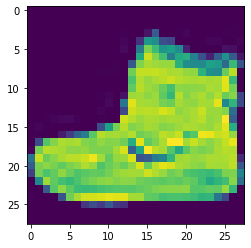

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [9]:
x_train[0].shape

(28, 28)

In [10]:
y_train[0]

9

label data 
0에서 9까지의 정수 값은 이미지(옷)의 클래스를 나타내는 레이블입니다. 각각의 레이블과 클래스는 아래와 같습니다.

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

In [11]:
print(x_test.shape)
print(x_test[0].shape)

(10000, 28, 28)
(28, 28)


In [13]:
#데이터 전처리 
x_train, x_test = x_train/255.0, x_test/255.0

In [15]:
x_train[0].shape

(28, 28)

In [23]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(units=512, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')])

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 977us/step - loss: 0.4745 - accuracy: 0.8307
Epoch 2/5
1875/1875 [==============================] - 2s 974us/step - loss: 0.3570 - accuracy: 0.8695
Epoch 3/5
1875/1875 [==============================] - 2s 968us/step - loss: 0.3231 - accuracy: 0.8812
Epoch 4/5
1875/1875 [==============================] - 2s 960us/step - loss: 0.3005 - accuracy: 0.8885
Epoch 5/5
1875/1875 [==============================] - 2s 952us/step - loss: 0.2799 - accuracy: 0.8965


In [26]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8820
0.3282511234283447 0.8820000290870667


In [30]:
predict = model.predict(x_test)
print(predict[0])
print(np.argmax(predict[0])) # 가장 높은 값 출력

[7.13811288e-10 2.64930069e-08 1.53852309e-09 9.63851132e-09
 2.47174299e-08 4.65696823e-04 1.58626321e-08 1.34221455e-02
 3.23087619e-08 9.86112058e-01]
9


## 뉴련의 개수의 영향 

In [41]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dense(128, activation='relu'),      ## CASE 1
    #tf.keras.layers.Dense(512, activation='relu'),    ## CASE 2
    tf.keras.layers.Dense(1024, activation='relu'),   ## CASE 3
    tf.keras.layers.Dense(10, activation='softmax')
])

In [42]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4709 - accuracy: 0.8312
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3564 - accuracy: 0.8684
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3195 - accuracy: 0.8818
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2942 - accuracy: 0.8910
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2788 - accuracy: 0.8966


In [37]:
#case1
loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8832
0.34293970465660095 0.8831999897956848


In [40]:
#case2
loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8659
0.3664815127849579 0.8658999800682068


In [43]:
#case3
loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8774
0.3445414900779724 0.8773999810218811


뉴런 노드의 개수가 증가하면 훈련 과정에서 손실 값이 감소하고 테스트 정확도는 증가하는 경향
하지만 계산과 최적화를 필요로 하는 파라미터의 숫자가 증가하기 때문에 훈련에 걸리는 시간은 증가

# 콜백(callback)
tf.keras.callbacks 모듈의 Callback 클래스를 사용하면,

훈련 중에 손실 값이 특정 기준 미만이 되었을 때 훈련을 중단할 수 있습니다.

In [55]:
import tensorflow as tf
from tensorflow import keras

In [63]:
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.3:
            print('\n훈련을 중지합니다')
            self.model.stop_training = True
            
            
callback= MyCallback()

fasion_minst = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fasion_minst.load_data()

In [64]:
#데이터 전처리
x_train, x_test = x_train / 255.0, x_test / 255.0


model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(units=512, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, callbacks = [callback])


Epoch 1/5
1875/1875 [==============================] - 2s 935us/step - loss: 0.4715 - accuracy: 0.8325
Epoch 2/5
1875/1875 [==============================] - 2s 938us/step - loss: 0.3581 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 2s 920us/step - loss: 0.3207 - accuracy: 0.8819
Epoch 4/5
1842/1875 [============================>.] - ETA: 0s - loss: 0.2990 - accuracy: 0.8898
훈련을 중지합니다
1875/1875 [==============================] - 2s 952us/step - loss: 0.2993 - accuracy: 0.8896


# 합성곱 신경망 사용하기 

In [66]:
import tensorflow as tf
from tensorflow.keras import datasets

minst = datasets.mnist
(x_train, y_train),(x_test, y_test) = minst.load_data()

In [68]:
x_train.shape

(60000, 28, 28)

In [69]:
print(type(x_train))

<class 'numpy.ndarray'>


In [70]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))
x_train, x_test = x_train/255.0, x_test/255.0

In [72]:
#합성곱 신경망 구성하기 

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________

In [73]:
#Dense 층 추가하기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 64)              

In [78]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0218 - accuracy: 0.9930
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0133 - accuracy: 0.9955
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0130 - accuracy: 0.9958


In [83]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0556 - accuracy: 0.9874
